# **Problem Statement: Decline in Yulu company's revenues.**


*  Every micro-mobility service provider wants to hold their customers for sustaining their business and thus this Yulu micro-mobility service provider. You have booking data of users at Yulu micro-mobility service provider with the aim of understanding

*  Assess the impact of demographic factors like season, holiday, working day, weather on count of bookings

*  Utilize your analytics skills to find factors contributing to potential decline in yulu company's revenue. This project provides an opportunity to enhance revenue enhancement strategies by uncovering patterns and insights within the dataset.







# **Perform Exploratory Data Analysis**

# **Importing the data set**

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


## **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Observation: there are 12 columns and 10886 rows having zero null values consists of object, int64 and float64 datatypes

# Univariant Analysis : Distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables


*   we performing univariant analysis on catergorical columns like season,working day and weather
*   we are not considered other columns because they do not have significant effect on booking count and also we going accordingly columns that are mentioned in the problem statement



## Visual Analysis of season

<Axes: xlabel='season', ylabel='count'>

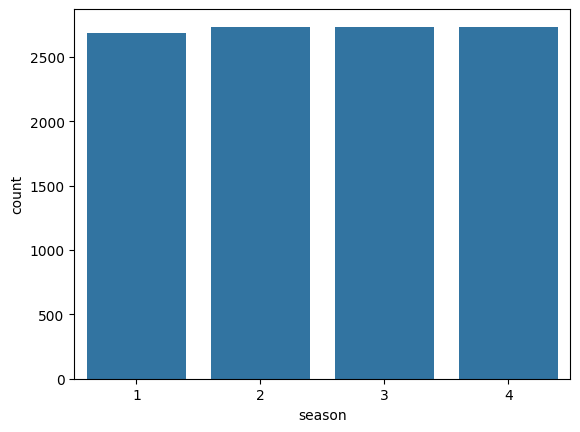

In [13]:
#Visual Analysis of season
import pandas as pd
import seaborn as sns
sns.countplot(x=df['season'])

In [14]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


Insight: Almost all the seasons have same number of rows, so in terms of distribution this feature is not biased

# Visual Analysis of working day

<Axes: xlabel='workingday', ylabel='count'>

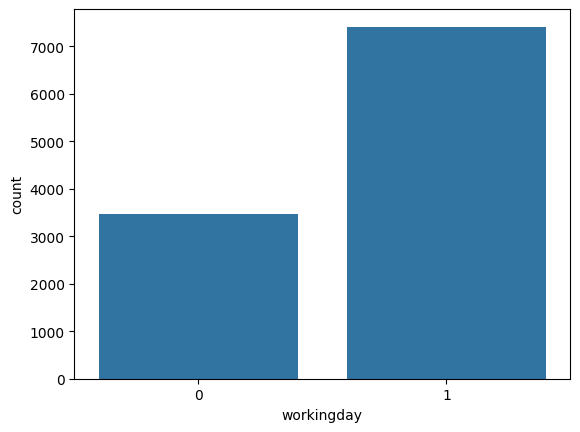

In [15]:

sns.countplot(x=df['workingday'])

In [16]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


Insight: It's clear that number of rows from non_working day(0) has significantly lower than that of working day, so size should be adjusted when performing the hypothesis testing to avoid bias

## Visual analysis of weather

<Axes: xlabel='weather', ylabel='count'>

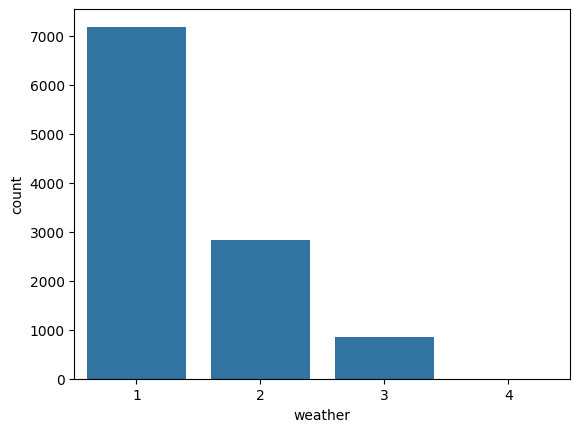

In [17]:

sns.countplot(x=df['weather'])

Insight: from the graph, we can conclude that the count of weather 4 is negligible and counts for remaining weathers also varying so we take count of weather 3 for weather 1 and 2 to avoid bias when performing hypothesis testing

# Bivariate Analysis : Relationships between important variables such as workday and count, season and count, weather and count.

# Relationship between working day and count

Text(0.5, 1.0, 'Relationship between workingday and count')

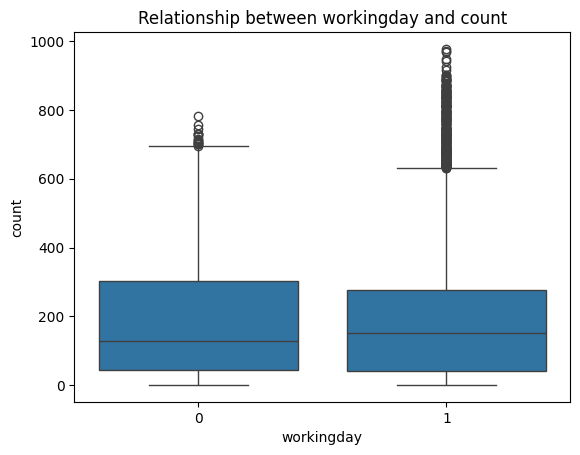

In [18]:
df['workingday'].value_counts()
df['count'].value_counts()
working_day_graph=sns.boxplot(x=df['workingday'],y=df['count'])
working_day_graph.set_title("Relationship between workingday and count")

**Insight**: we conclude that there is very negligible difference of counts between medians of working and non working days and we futher confirm this by performing a hypothesis test
**Outliers**: we are not handling the outliers as the data is not that sensitive, so having the outliers give more comprehensive result

# Relationship between season and count

Text(0.5, 1.0, 'Relationship between season and count')

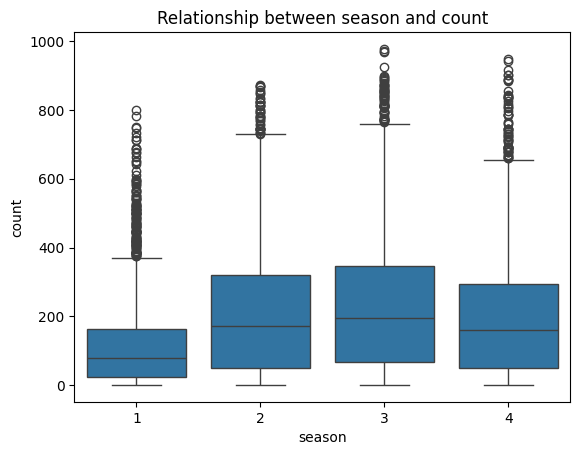

In [19]:
df['season'].value_counts()
season_graph=sns.boxplot(x=df['season'],y=df['count'])
season_graph.set_title("Relationship between season and count")

Insight: There slight variation in the medians of the seasons

Text(0.5, 1.0, 'Relationship between weather and count')

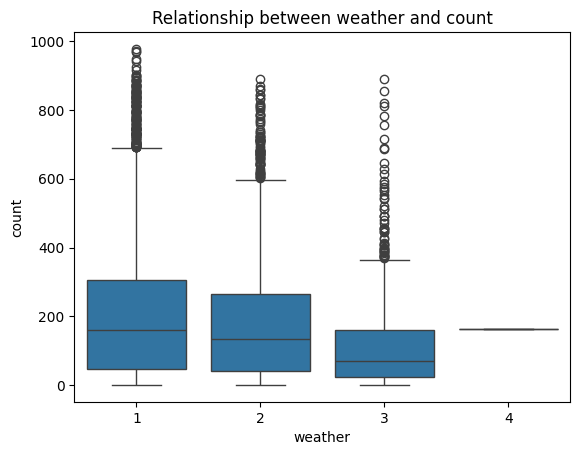

In [20]:
weather_graph=sns.boxplot(x=df['weather'],y=df['count'])
weather_graph.set_title('Relationship between weather and count')

Insight: Slight difference in medians of weathers 1,2 and 3 where as weather 4 has no data

# Hypothesis Testing


*   Performing hypothesis testing on features weather, season and working day to conclude how significantly there are impacting the count of bookings



# Hypothesis Testing Workingday vs Count

In [21]:
df['workingday'].value_counts()
working_day=df.loc[df['workingday']==1, 'count'].sample(3472)
non_working_day=df.loc[df['workingday']==0, 'count'].sample(3472)
working_day_variance= working_day.var()
non_working_day_variance= non_working_day.var()
#print(round(non_working_day_variance,2))
print(f'working_day_variance= {round(working_day_variance,2)} \nnon_working_day_variance= {round(non_working_day_variance,2)}')


working_day_variance= 34340.9 
non_working_day_variance= 30156.92


## INDEPENDENT T-TEST

*   We are choosing **INDEPENDENT T-TEST**  because there are two catergorical columns "working" and "non working days" and one numerical column "count".

*  **Assumptions**:


1.   As the sample count is more than 30 its violating the assumption of t-test where sample size should be less than 30 but still we using t-test because the population standard deviation is not given
2.   As sample size is more 30 , the distribution assumed to be normal according clt theorem and t-test behaves like z-test
3.   As the sample size is more , the difference in variance will also negligible



*   **Hypothesis**:

1.   Null Hypothesis: Mean of count on working day is **less than or equal** to mean of count on non working day
2.   Alternate Hypothesis: Mean of count on working day is** greater than**  mean of count non working day
3.   signifance level=5%
















**Checking for variance equality using levene test**

In [22]:
from scipy.stats import levene
statistic, p_value = levene(working_day, non_working_day)
print(f'Levene test p-value: {p_value}')
if p_value < 0.05:
  print('Use equal_var=False')
else:
  print('Use equal_var=True')

Levene test p-value: 0.9631966447139151
Use equal_var=True


In [34]:
from scipy.stats import ttest_ind
significance_level=0.05
test_value,p_value=ttest_ind(working_day,non_working_day,alternative='greater',equal_var=True)
print(f"test_stastic_value={test_value:.3f}, p_value={p_value:.3f}")
if p_value<significance_level:
  print(f'p-value ({p_value:.4f}) < {significance_level}')
  print('Conclusion:Null Hypothesis is rejected so Working Day has an effect on the number of electric cycles rented')
else:
  print(f'p-value ({p_value:.4f}) >= {significance_level}')
  print('Conclusion:Failed to reject Null Hypothesis so Working Day has no effect on the number of electric cycles rented')


test_stastic_value=0.573, p_value=0.283
p-value (0.2834) >= 0.05
Conclusion:Failed to reject Null Hypothesis so Working Day has no effect on the number of electric cycles rented


# **Hypothesis Testing on weather vs Count**

In [24]:
df['weather'].value_counts()
df_weather=df[df['weather']!=4]
df_weather['weather'].value_counts()
df_weather_1=df.loc[df['weather']==1,'count']
df_weather_2=df.loc[df['weather']==2,'count']
df_weather_3=df.loc[df['weather']==3,'count']

# **Anova Test on weather vs count:**
We are performing anova test since there are 3 categorical groups


# **Testing Assumptions**
1. Analysing whether the distribution is normal distribution or not and for this we are using shapiro test
2. Analysing whether variance across groups is same or not using levene test

# **Shapiro Test**



*   Null Hypothesis: Distribution is normal
*   Alternate Hypothesis: Distribution is not normal
*   Significance level: 5%






In [25]:
Significance_level=0.05
from scipy.stats import shapiro
test_statistic_1,p_value_1=shapiro(df_weather_1)
test_statistic_2,p_value_2=shapiro(df_weather_2)
test_statistic_3,p_value_3=shapiro(df_weather_3)
print(f"test_stastic_value_1={test_statistic_1}, p_value_1={p_value_1}")
print(f"test_stastic_value_2={test_statistic_2}, p_value_2={p_value_2}")
print(f"test_stastic_value_3={test_statistic_3}, p_value_3={p_value_3}")

if p_value_1<significance_level:
  print('Conclusion:Null Hypothesis is rejected so weather_1 Distribution is not normal')
else:
  print('Conclusion:Failed to reject Null Hypothesis so weather_1 Distribution is normal')
if p_value_2<significance_level:
  print('Conclusion:Null Hypothesis is rejected so weather_2 Distribution is not normal')
else:
  print('Conclusion:Failed to reject Null Hypothesis so weather_2 Distribution is normal')
if p_value_3<significance_level:
  print('Conclusion:Null Hypothesis is rejected so weather_3 Distribution is not normal')
else:
  print('Conclusion:Failed to reject Null Hypothesis so weather_3 Distribution is normal')

test_stastic_value_1=0.8909259459740138, p_value_1=1.5964921477006555e-57
test_stastic_value_2=0.8767694973495206, p_value_2=9.777839106111785e-43
test_stastic_value_3=0.7674327906035717, p_value_3=3.875893017396149e-33
Conclusion:Null Hypothesis is rejected so weather_1 Distribution is not normal
Conclusion:Null Hypothesis is rejected so weather_2 Distribution is not normal
Conclusion:Null Hypothesis is rejected so weather_3 Distribution is not normal


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


# **Levene Test for analysis variance**


1.   Null Hypothesis :Variance of all groups are equal

2.   Alternate Hypothesis: Variance of all groups are not equal
3.   significance level: 5%




In [26]:
significance_level=0.05
from scipy.stats import levene
levene_test_stat,P_value=levene(df_weather_1,df_weather_2,df_weather_3)
print(f"levene_test_stat={levene_test_stat}, P_value={P_value}")
if P_value<significance_level:
  print('Conclusion: Null Hypothesis is rejected so Variance of all groups are not equal')
else:
  print('Conclusion: Failed to reject Null Hypothesis so Variance of all groups are equal')




levene_test_stat=81.67574924435011, P_value=6.198278710731511e-36
Conclusion: Null Hypothesis is rejected so Variance of all groups are not equal


# **Performing Anova test on weather groups**

---

*   Testing using Anova even though the assumptions are not satisfied because as the sample size is large the sample data is assumed to follow normal distribution according CLT theorem and unequal variance can be neglected
*   As the assumptions are not satisfied ,instead of perfoming K-W test  which is a non-parametric test we are using anova parametric test because parametric tests are more powerful and accurate , so the future processing will also be accurate

*   Null Hypothesis: Number of cycles rented is similar in different weathers
*   Alternate Hypothesis: Number of cycles rented is different in different weathers




In [38]:
significance_level=0.05
from scipy.stats import f_oneway
anova_test_stats,p_value_anova=f_oneway(df_weather_1,df_weather_2,df_weather_3)
print(f"anova_test_stats={anova_test_stats:.3f}")
if p_value_anova<significance_level:
  print(f'ANOVA p-value ({p_value_anova:.4e}) < {significance_level}')
  print('Conclusion: Null Hypothesis is rejected so Number of cycles rented is different in different Weathers')
  print('Further analysis, Tukey HSD is needed to determine which specific Weathers conditions differ')
else:
  print(f'ANOVA p-value ({p_value_anova:.4e}) >= {significance_level}')
  print('Conclusion: Failed to reject Null Hypothesis so  Number of cycles rented is similar in different weathers')

anova_test_stats=98.284
ANOVA p-value (4.9764e-43) < 0.05
Conclusion: Null Hypothesis is rejected so Number of cycles rented is different in different Weathers
Further analysis, Tukey HSD is needed to determine which specific Weathers conditions differ


# **Anova test on Seasons vs count**


Testing the assumtions:


*   Shapiro test for testing normality
*   levene test for variance





# **Shapiro test for testing normality of seasons vs count**

In [28]:
from scipy.stats import shapiro
df['season'].value_counts()
p_values={}
significance_level=0.05
for i in [1,2,3,4]:
  season=df.loc[df['season']==i,'count'].sample(2686)
  testvalue,p_value=shapiro(season)
  p_values[f'season_{i}'] = p_value
  if p_value < significance_level:
    print(f"Conclusion: Null Hypothesis is rejected so season_{i} Distribution is not normal")
  else:
    print(f"Conclusion: Failed to reject Null Hypothesis so season_{i} Distribution is normal")
print(p_values)

Conclusion: Null Hypothesis is rejected so season_1 Distribution is not normal
Conclusion: Null Hypothesis is rejected so season_2 Distribution is not normal
Conclusion: Null Hypothesis is rejected so season_3 Distribution is not normal
Conclusion: Null Hypothesis is rejected so season_4 Distribution is not normal
{'season_1': np.float64(8.749584618865787e-49), 'season_2': np.float64(1.2881198662926955e-38), 'season_3': np.float64(1.2679827458415168e-36), 'season_4': np.float64(1.7033595383519282e-39)}


# Levene Test for testing variance across seasons groups

1.   Null Hypothesis: Variance across groups are same
2.   Alternate Hypothesis: Variance across groups are not same
3.   Significance level= 5%



In [29]:
significance_level=0.05
season_1=df.loc[df['season']==1,'count'].sample(2686)
season_2=df.loc[df['season']==2,'count'].sample(2686)
season_3=df.loc[df['season']==3,'count'].sample(2686)
season_test_value_variance,season_var_p_value=levene(season_1,season_2,season_3)
print(f"season_test_value_variance={season_test_value_variance}, season_var_p_value={season_var_p_value}")
if season_var_p_value<significance_level:
  print('Conclusion: Null Hypothesis is rejected so Variance of all groups are not equal')
else:
  print('Conclusion: Failed to reject Null Hypothesis so Variance of all groups are equal')

season_test_value_variance=281.04200904034764, season_var_p_value=1.0357688444666755e-118
Conclusion: Null Hypothesis is rejected so Variance of all groups are not equal


# **Performing Anova Test on seasons vs count**


1.   similarly as mentioined in anova test of weather vs count, though the assumptions are failed, anova test is used for this test for the same reasons that are mentioned in anova test of weather vs count
2.  Null Hypothesis: Number of cycles rented is similar in different seasons

  Alternate Hypothesis: Number of cycles rented is different in different Seasons



In [39]:
significance_level=0.05
from scipy.stats import f_oneway
season_anova_test_stats,season_p_value_anova=f_oneway(season_1,season_2,season_3)
print(f"season_anova_test_stats={season_anova_test_stats:.3f}")
if season_p_value_anova<significance_level:
  print(f'ANOVA p-value ({season_p_value_anova:.4e}) < {significance_level}')
  print('Conclusion: Null Hypothesis is rejected so Number of cycles rented is different in different Seasons')
  print('Further analysis, Tukey HSD is needed to determine which specific Seasons conditions differ')
else:
  print(f'ANOVA p-value ({season_p_value_anova:.4e}) >= {significance_level}')
  print('Conclusion: Failed to reject Null Hypothesis so  Number of cycles rented is similar in different Seasons')

season_anova_test_stats=355.164
ANOVA p-value (1.5136e-148) < 0.05
Conclusion: Null Hypothesis is rejected so Number of cycles rented is different in different Seasons
Further analysis, Tukey HSD is needed to determine which specific Seasons conditions differ


**Performing Tukey test on weathers and seasons**

In [40]:
from scipy.stats import tukey_hsd
# For weather
weather_groups = [df_weather_1, df_weather_2, df_weather_3]
tukey_results = tukey_hsd(*weather_groups)
print(tukey_results)
# For seasons
season_groups = [season_1, season_2, season_3, df.loc[df['season']==4,'count'].sample(2686)]
tukey_results_seasons = tukey_hsd(*season_groups)
print(tukey_results_seasons)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     26.281     0.000    16.947    35.616
 (0 - 2)     86.390     0.000    71.197   101.584
 (1 - 0)    -26.281     0.000   -35.616   -16.947
 (1 - 2)     60.109     0.000    43.716    76.502
 (2 - 0)    -86.390     0.000  -101.584   -71.197
 (2 - 1)    -60.109     0.000   -76.502   -43.716

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -98.207     0.000  -110.471   -85.943
 (0 - 2)   -118.503     0.000  -130.767  -106.239
 (0 - 3)    -81.661     0.000   -93.925   -69.397
 (1 - 0)     98.207     0.000    85.943   110.471
 (1 - 2)    -20.296     0.000   -32.560    -8.032
 (1 - 3)     16.546     0.003     4.282    28.810
 (2 - 0)    118.503     0.000   106.239   130.767
 (2 - 1)     20.296     0.000     8.032    32.560
 (2 - 3)     36.842     0.000    24.578    49.106
 (3 - 0)     

# **Chi-square test on weather and season**


1.   Selected chi-square test as two categorical columns are involved
2.   Null Hypothesis: Weather and season are independent variables
     Alternate Hypothesis: Weather and season are dependent variables
3.   significance level= 5%     



In [31]:
significance_level=0.05
chi_square_table=pd.crosstab(index=df['season'],columns=df['weather'])
chi_square_table
from scipy.stats import chi2_contingency
chi_test_value,chi_p_value,dof,expected_value=chi2_contingency(chi_square_table)
print(f"chi_test_value={chi_test_value}, chi_p_value={chi_p_value}")
if chi_p_value<significance_level:
  print('Conclusion: Null Hypothesis is rejected so Weather and season are dependent variables')
else:
  print('Conclusion: Failed to reject Null Hypothesis so Weather and season are independent variables')

chi_test_value=49.158655596893624, chi_p_value=1.549925073686492e-07
Conclusion: Null Hypothesis is rejected so Weather and season are dependent variables


**Calculation of Cramers V**

In [41]:
from scipy.stats import chi2_contingency
import numpy as np
chi2, p, dof, expected = chi2_contingency(chi_square_table)
n = np.sum(chi_square_table.values)
cramer_v = np.sqrt(chi2 / (n * (min(chi_square_table.shape) - 1)))
print(f'Cramers V: {cramer_v:.4f}')
if cramer_v < 0.1:
      print('Weak association')
elif cramer_v < 0.3:
      print('Moderate association')
else:
      print('Strong association')

Cramers V: 0.0388
Weak association


**Analysis of expected frequency**

In [42]:
expected_freq = chi2_contingency(chi_square_table)[3]
print('Cells with expected frequency < 5:')
print(np.sum(expected_freq < 5))
print('Percentage of cells with expected frequency < 5:')
print(np.mean(expected_freq < 5) * 100)
if np.mean(expected_freq < 5) > 0.2:
  print('Warning: More than 20% of cells have expected frequency < 5')
  print('Consider combining categories or using Fishers exact test')

Cells with expected frequency < 5:
4
Percentage of cells with expected frequency < 5:
25.0
Consider combining categories or using Fishers exact test


# **Observation & Recommendation:**
The number of cycles rented is dependent on weather and seasons, also weather and seasons both dependent on each other

# **Recommendation:**


1. **As number of cycles rented is dependent on seasons:**

  *   so Increase rental prices during peak seasons and offer discounts in off season
  *   Increase bike availability in peak seasons and decrease the count in off season

  *   Target advertising efforts based on high-demand seasons and provide weather-appropriate offers, such as rain gear discounts for monsoon seasons.
  *   Collaborate with tourism companies, hotels, or fitness clubs to attract riders in low-demand seasons.


2. **As number of cycles rented is dependent on weather:**

  *   Increase prices in good weather and offer discounts in bad weather
  *   Send real-time alerts to users about weather & cycling conditions by partnering with weather apps

  *   Promote outdoor fitness & eco-friendly commuting during summers and raincoats during rainy days and winter wear during winter days

3. As weather and season are dependent on each other look for the combinations of weather and season like during summer and sunny days price and cycles count can be increased and relevent advertisements can be promoted, in the same way identify non peak combination and decreae the price and cycles count and increase the offers for the commuters


# **Conclusion:**

Decline in count of booking the cycles makes a significant impact on firm reputation and leads to financial loss and in order to deal with this crisis a comprehensive data analysis needed for making an informed decision by decision makers



In [43]:
print('Key Findings:')
print('1. Working days do not significantly affect cycle rentals (p-value > 0.05)')
print('2. Weather conditions significantly affect cycle rentals (ANOVA p-value < 0.05)')
print('3. Seasons significantly affect cycle rentals (ANOVA p-value < 0.05)')
print('4. Weather and season are dependent variables (Chi-square p-value < 0.05)')
print('\nRecommendations:')
print('1. Adjust pricing and marketing strategies based on weather forecasts')
print('2. Implement seasonal promotions to boost rentals during low-demand periods')
print('3. Consider weather-season combinations for more targeted strategies')

Key Findings:
1. Working days do not significantly affect cycle rentals (p-value > 0.05)
2. Weather conditions significantly affect cycle rentals (ANOVA p-value < 0.05)
3. Seasons significantly affect cycle rentals (ANOVA p-value < 0.05)
4. Weather and season are dependent variables (Chi-square p-value < 0.05)

Recommendations:
1. Adjust pricing and marketing strategies based on weather forecasts
2. Implement seasonal promotions to boost rentals during low-demand periods
3. Consider weather-season combinations for more targeted strategies
